In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv("./diabetes.csv")
df.head()
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
a=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
b=["Not" ,"Diabetic"]


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
display (X.shape, y.shape)



(768, 8)

(768,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)

In [11]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)




DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini: ',accuracy_score(y_train, y_pred = classifier.predict(X_train)))
print('Accuracy on test data using Gini: ',accuracy_score(y_test,y_pred))

Accuracy on train data using Gini:  1.0
Accuracy on test data using Gini:  0.7135416666666666


In [15]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_test,y_pred_entropy))

Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.734375


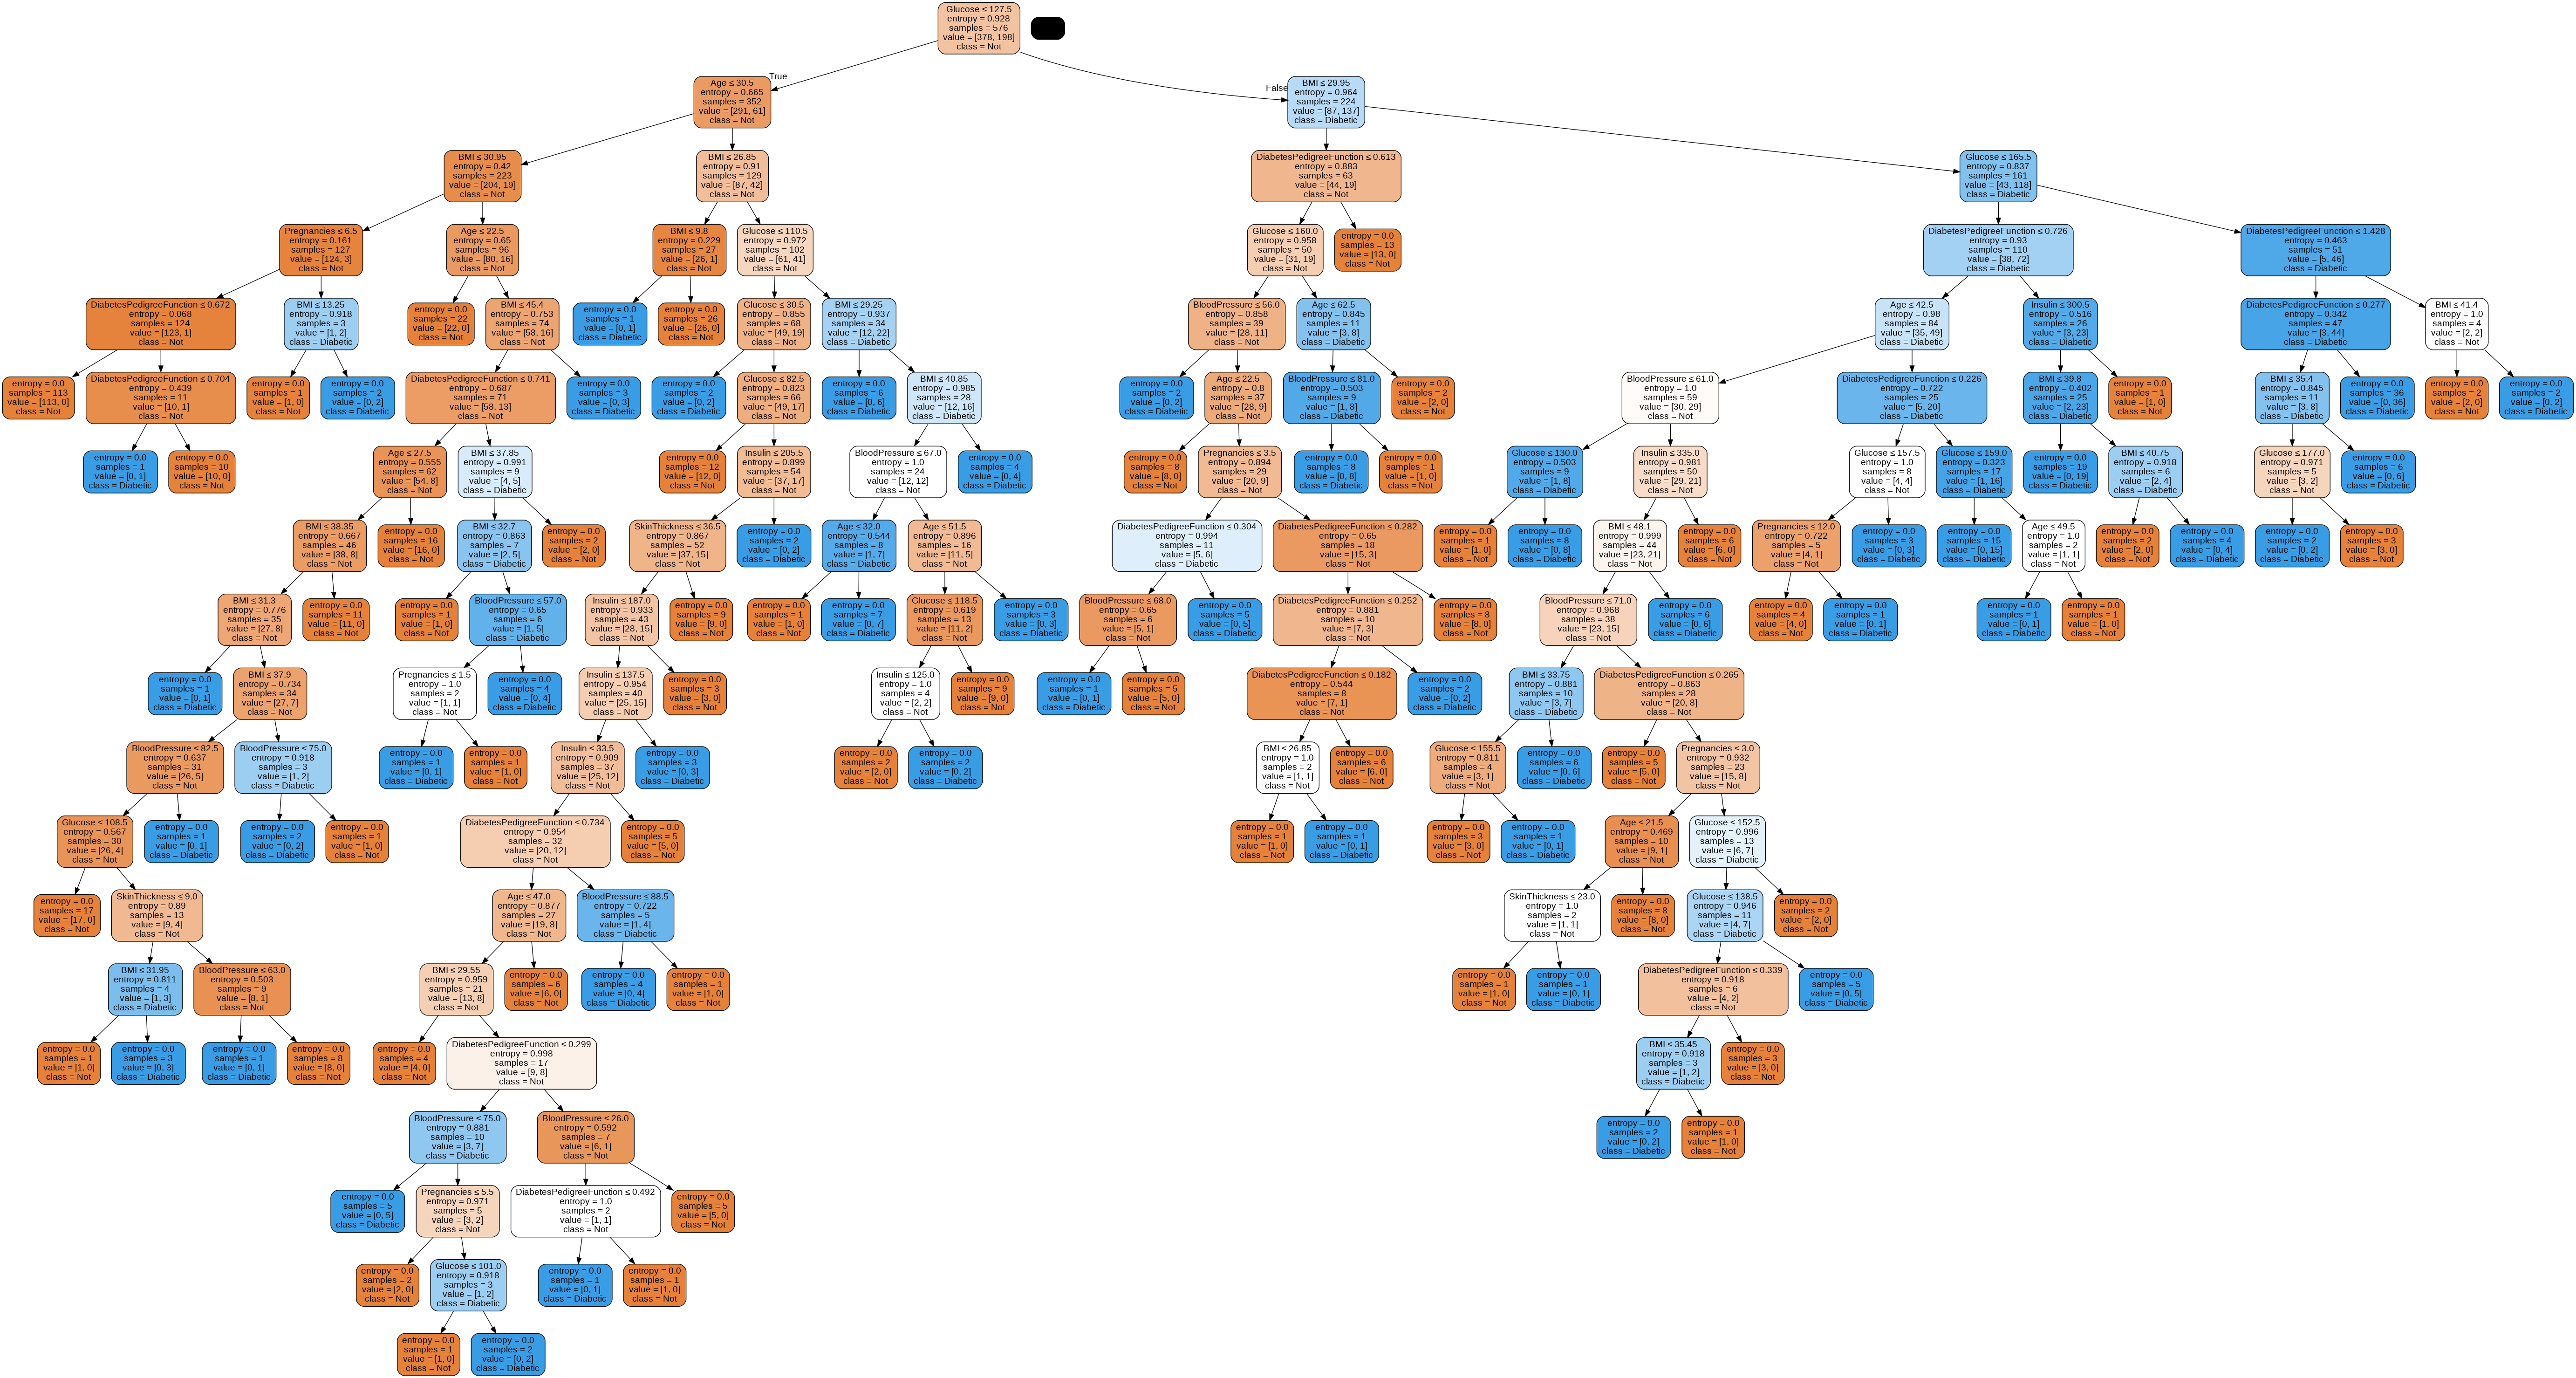

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(classifier_entropy, out_file = dot_data,filled = True, rounded = True,special_characters = True, feature_names = a, class_names = b)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
